#### Unsupervised Learning Project 1
- EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points
- Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data-set) – 5 points
- Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)
- Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
car_data = pd.read_csv('/content/drive/My Drive/Great_Lakes_Assignments/05_UnsupervisedLearning_R4_Project1/cars-dataset.csv')

In [4]:
car_data.shape

(398, 8)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [7]:
car_data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [9]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


Initial observation from info() and describe:
- Need to check hp column as it is object.
- disp, wt, acc are continous data. 
- wt may contain some outlier.
- cyl, yr are numeric categorical data
- mpg is continous target column
- There are no null values in dataset

In [11]:
# cross checking for na values
print("NA Available")
print(car_data.isna().sum())


NA Available
car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64


In [12]:
# Differnt cars in column 'car name'
car_data['car name'].nunique()

305

In [0]:
# Unique values in hp column
car_data['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
# There are "?" values present in dataset we need to treat this by replacing it with proper no.s
# let's first check how many row have the same so that we can remove them or change them to mean

car_data[car_data['hp'] == "?"]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [0]:
# Let's replace them by mean as there are 6 rows containing "?"
# First let's replace ? with NAN value
car_data.replace('?',np.NAN, inplace=True)

In [0]:
# converting column type from object to float
car_data['hp'] = car_data['hp'].astype('float64')

In [17]:
# Now let's check the mean for the same
print("Mean hp : ", np.mean(car_data['hp']))

Mean hp :  104.46938775510205


In [0]:
# replace "?" with the mean
car_data['hp'].replace(np.NAN, np.mean(car_data['hp']), inplace=True)

In [19]:
# Unique values in hp column
car_data['hp'].unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [20]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [21]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [0]:
# We can clearly see that the hp column is not a float

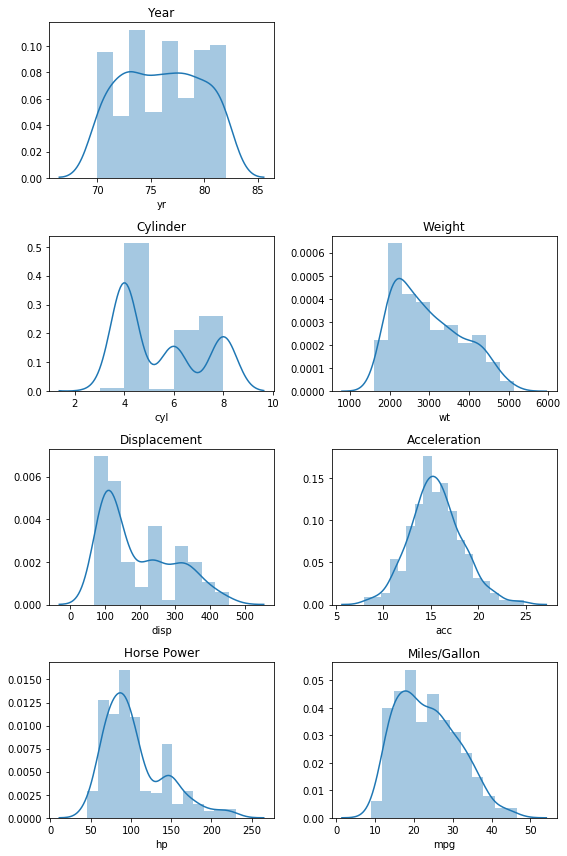

In [26]:
# Univariate analysis
fig = plt.figure(figsize=(8,12))

plt.subplot2grid((4,2),(0,0))
plt.title("Year")
sns.distplot(car_data['yr'])

plt.subplot2grid((4,2),(1,0))
plt.title("Cylinder")
sns.distplot(car_data['cyl'])

plt.subplot2grid((4,2),(2,0))
plt.title("Displacement")
sns.distplot(car_data['disp'])

plt.subplot2grid((4,2),(3,0))
plt.title("Horse Power")
sns.distplot(car_data['hp'])

plt.subplot2grid((4,2),(1,1))
plt.title("Weight")
sns.distplot(car_data['wt'])

plt.subplot2grid((4,2),(2,1))
plt.title("Acceleration")
sns.distplot(car_data['acc'])

plt.subplot2grid((4,2),(3,1))
plt.title("Miles/Gallon")
sns.distplot(car_data['mpg'])

plt.tight_layout();

Observations:
- mpg and acc are uniformily distributed.
- cyl have three peak which may mean there is 3 category in it.

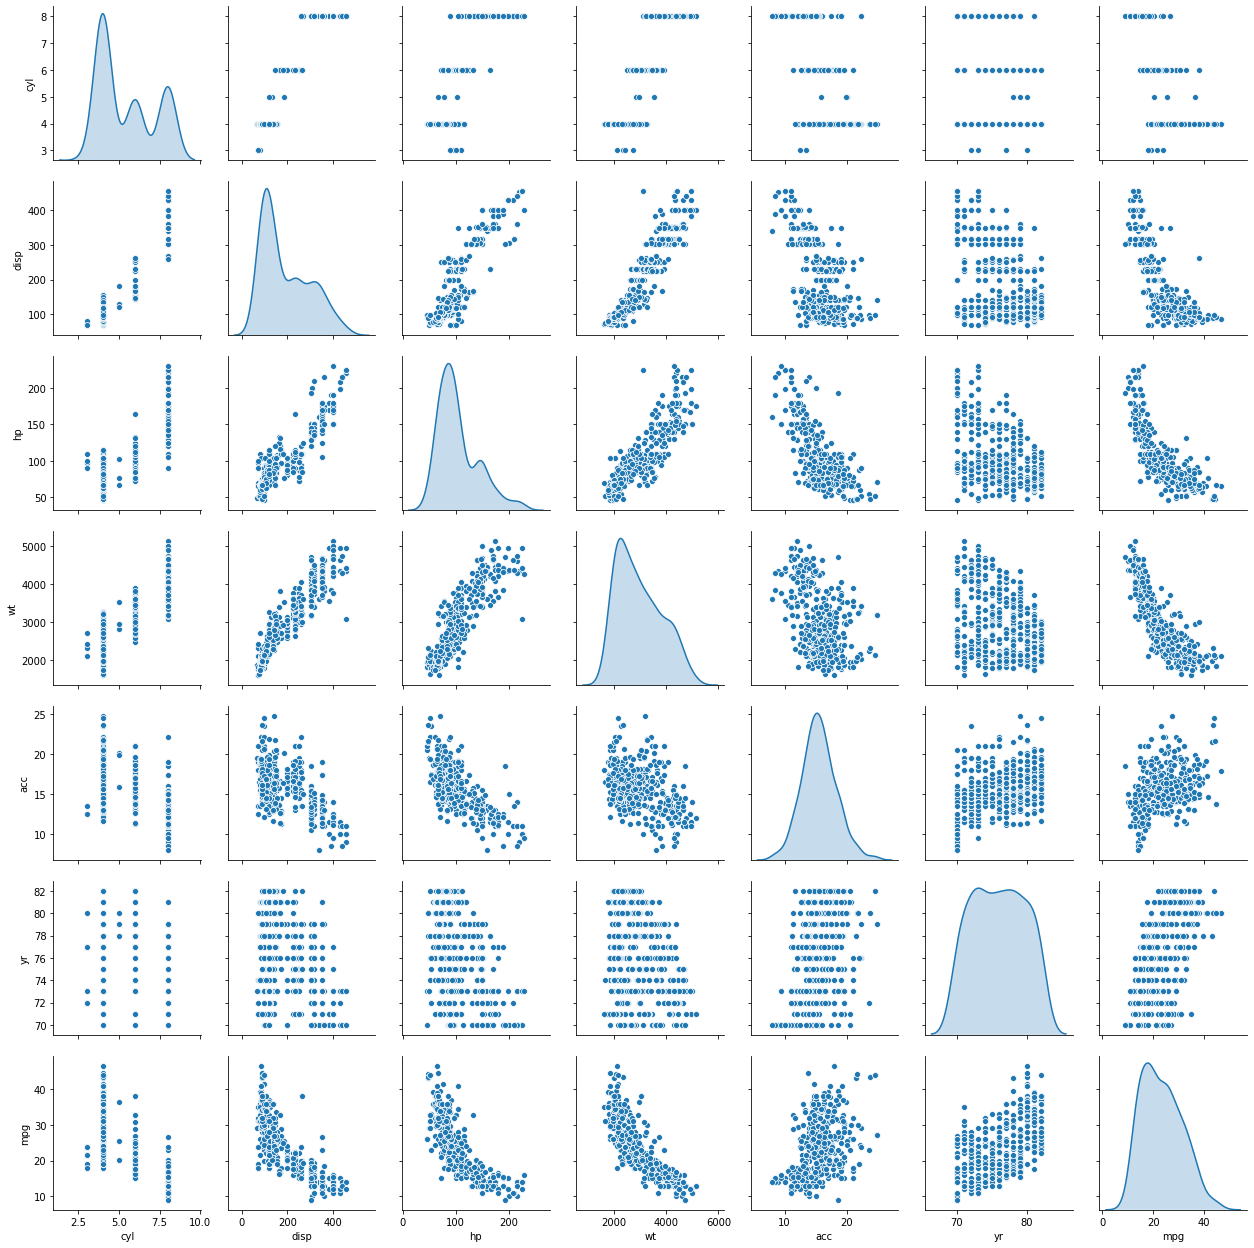

In [29]:
# Bivariate analysis
sns.pairplot(data=car_data, diag_kind='kde');

Observations:
- cyl, disp, hp, wt are highly directly correlated.
- acc, yr, mpg are nearly higly inversely correlated.

In [0]:
corr = car_data.corr()

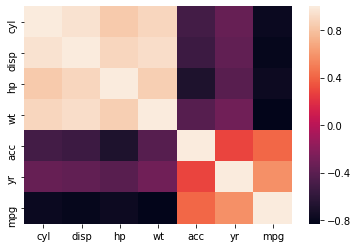

In [32]:
sns.heatmap(corr);

In [0]:
# Preparing dataset for modeling - features
X = car_data.drop(['mpg', 'car name'], axis=1, inplace=False)

# labels
y = car_data[['mpg']]


In [34]:
y.shape

(398, 1)

In [35]:
 X.shape

(398, 6)

In [37]:
X.sample(5)

,cyl,disp,hp,wt,acc,yr
391,4,135.0,84.0,2370,13.0,82
110,4,108.0,94.0,2379,16.5,73
358,4,120.0,74.0,2635,18.3,81
134,6,258.0,110.0,3632,18.0,74
195,4,85.0,52.0,2035,22.2,76


In [0]:
# Applyying StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [39]:
# KMeans Clustering Algorithm
from sklearn.cluster import KMeans

# Label, Intertia and Centroid
cluster_range = range(1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(X_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( {"num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2388.000000
1,2,1069.715267
2,3,808.948714
3,4,641.795074
4,5,564.119079
5,6,497.143884
6,7,449.280634
7,8,407.557286
8,9,376.723684


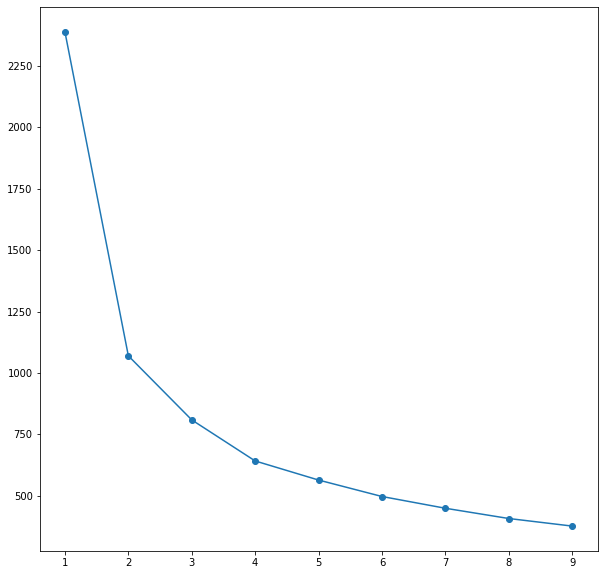

In [41]:
plt.figure(figsize=(10,10))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o");

 - As we can see from the above elbow graph at K=2 we can see the clear elbow

In [42]:
# Building Model with k=2
kmeansmodel = KMeans(n_clusters = 2, init='k-means++' )
kmeansmodel.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
labels = kmeansmodel.predict(X_scaled)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [44]:
# Get the centroids.... using function cluster_centers_
centroids = kmeansmodel.cluster_centers_
centroids

array([[-0.52196387, -0.51111515, -0.50151224, -0.47405915,  0.34576646,
         0.20543235],
       [ 1.47555172,  1.44488321,  1.41773652,  1.34012874, -0.9774552 ,
        -0.58074144]])

In [0]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns = list(X_scaled) )

In [46]:
data_scaled = pd.DataFrame(X_scaled)

data_scaled['car name'] = car_data['car name'].values
data_scaled['group'] = labels
data_scaled['mpg'] = car_data['mpg'].values
data_scaled.head()

,0,1,2,3,4,5,car name,group,mpg
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,chevrolet chevelle malibu,1,18.0
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,buick skylark 320,1,15.0
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,plymouth satellite,1,18.0
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,amc rebel sst,1,16.0
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,ford torino,1,17.0


In [47]:
data_scaled.sample(5)

,0,1,2,3,4,5,car name,group,mpg
140,1.498191,1.061796,1.193426,1.521175,-0.024722,-0.544290,amc matador (sw),1,14.0
251,1.498191,1.042591,0.905100,0.708905,-1.005035,0.538847,mercury monarch ghia,1,20.2
168,-0.856321,-0.513026,-0.562745,-0.391858,0.519896,-0.273506,ford pinto,0,23.0
24,0.320935,0.053526,-0.379265,-0.381217,-0.206262,-1.627426,amc gremlin,0,21.0
328,-0.856321,-0.455410,-0.982129,0.330554,2.262675,1.080415,mercedes-benz 240d,0,30.0


In [48]:
# Count the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case

data_scaled["group"].value_counts()

0    294
1    104
Name: group, dtype: int64

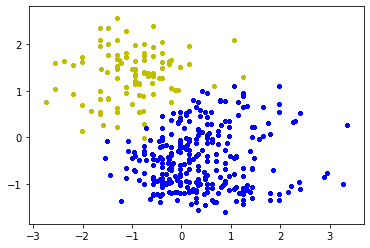

In [53]:
colors = ['b', 'y','r','g']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(data_scaled.loc[data_scaled['group'] == i])
        ax.scatter(points[:, 4], points[:, 3], s=10, c=colors[i])

In [54]:
data_scaled.pop('car name')

df1 = data_scaled[data_scaled.group == 0]
df2 = data_scaled[data_scaled.group == 1]
df3 = data_scaled[data_scaled.group == 2]

X1 = df1.drop('mpg' , axis = 1)
y1 = df1['mpg']
print(X1.shape)
print(y1.shape)
X2 = df2.drop('mpg' , axis = 1)
y2= df2['mpg']
print(X2.shape)
print(y2.shape)

(294, 7)
(294,)
(104, 7)
(104,)


In [55]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=5)

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model_score = model.score(X_test, y_test)
print(model_score)

0.7554175936130169


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model_score = model.score(X_test, y_test)
print(model_score)

0.6125129865205123
